In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = './data/0803/'
train_df = pd.read_csv(data_path + 'train.csv', index_col='Id')
test_df = pd.read_csv(data_path + 'test.csv', index_col='Id')
solution_df = pd.read_csv(data_path + 'solution.csv', index_col='Id')

In [3]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
solution_df.head()

,SalePrice
Id,
1461,105000.0
1462,172000.0
1463,189900.0
1464,195500.0
1465,191500.0


In [6]:
test_df = pd.merge(test_df, solution_df, how='left', left_index=True, right_index=True)
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000.0
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000.0
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900.0
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500.0
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500.0


In [7]:
df = pd.concat([train_df, test_df], axis=0)
df.shape

(2919, 80)

# 문제해결 정의
## 문제정의
* 주택 매입시 적정 금액 산정 어려움
## 기대효과
* 주택 매입시 표준금액 환용 및 적정 금액으로 매수
* 주택 매입 시간과 인적 자원 감소
## 해결방안
* 주택 가격 예측 모델링을 통한 적정 주택 가격 산정
* Session 1
- Data 전처리 및 EDA
* Session 2
- 유의미한 변수를 찾는 Feature Selection
* Session 3
- TabNet 알고리즘 사용 부동산 가격 예측 모델링 수정
## 성과측정
* 모델 운영 전/후 평균 부동산 매입 가격 비교
## 현업적용
* 부동산 매입 시 매입 가격 선정 시 활용

## Session 1 Data 전처리 및 EDA
* Data shape 확인
* Data type 확인
* Null값 확인
* Outlier 확인

In [8]:
df.shape

(2919, 80)

In [9]:
def show_summary(df_):
    summary = df_.dtypes.reset_index()
    summary.columns = ['column', 'type']
    summary['nunique'] = df_.nunique().values
    summary['null'] = df_.isnull().sum(axis=0).values
    summary['1th'] = df_.iloc[0].values
    summary['2th'] = df_.iloc[1].values
    print(f'shape : {df_.shape}')
    return summary

In [10]:
summary_df = show_summary(df)
summary_df.sort_values(by='column')

shape : (2919, 80)


,column,type,nunique,null,1th,2th
42,1stFlrSF,int64,1083,0,856,1262
43,2ndFlrSF,int64,635,0,854,0
68,3SsnPorch,int64,31,0,0,0
5,Alley,object,2,2721,NaN,NaN
50,BedroomAbvGr,int64,8,0,3,3
...,...,...,...,...,...,...
8,Utilities,object,2,2,AllPub,AllPub
65,WoodDeckSF,int64,379,0,0,298
18,YearBuilt,int64,118,0,2003,1976
19,YearRemodAdd,int64,61,0,2003,1976


In [11]:
summary_df.loc[summary_df['null']>0, ['column', 'null']].sort_values(by='null', ascending=False)

,column,null
71,PoolQC,2909
73,MiscFeature,2814
5,Alley,2721
72,Fence,2348
56,FireplaceQu,1420
2,LotFrontage,486
59,GarageFinish,159
62,GarageQual,159
63,GarageCond,159
58,GarageYrBlt,159


In [12]:
df = df.drop(columns=summary_df.loc[summary_df['null']>(len(df)/2), 'column'].values)

In [13]:
show_summary(df)

shape : (2919, 76)


,column,type,nunique,null,1th,2th
0,MSSubClass,int64,16,0,60,20
1,MSZoning,object,5,4,RL,RL
2,LotFrontage,float64,128,486,65.0,80.0
3,LotArea,int64,1951,0,8450,9600
4,Street,object,2,0,Pave,Pave
...,...,...,...,...,...,...
71,MoSold,int64,12,0,2,5
72,YrSold,int64,5,0,2008,2007
73,SaleType,object,9,1,WD,WD
74,SaleCondition,object,6,0,Normal,Normal


In [14]:
numerical_list = []
categorical_list = []

for col in df.columns:
    if df[col].dtypes == 'O':
        categorical_list.append(col)
    else:
        numerical_list.append(col)
print('categorical columns : ', categorical_list)
print('numerical columns : ', numerical_list)

categorical columns :  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
numerical columns :  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclo

In [15]:
# numerical feature 변환
df[numerical_list] = df[numerical_list].apply(lambda c: c.fillna(c.mean()), axis=0)

In [16]:
df[categorical_list] = df[categorical_list].apply(lambda c: c.fillna('None'), axis=0)

In [17]:
show_summary(df)

shape : (2919, 76)


,column,type,nunique,null,1th,2th
0,MSSubClass,int64,16,0,60,20
1,MSZoning,object,6,0,RL,RL
2,LotFrontage,float64,129,0,65.0,80.0
3,LotArea,int64,1951,0,8450,9600
4,Street,object,2,0,Pave,Pave
...,...,...,...,...,...,...
71,MoSold,int64,12,0,2,5
72,YrSold,int64,5,0,2008,2007
73,SaleType,object,10,0,WD,WD
74,SaleCondition,object,6,0,Normal,Normal


In [18]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180707.333333
std,42.517628,21.312345,7886.996359,1.409947,1.113131,30.291442,20.894344,178.626089,455.532750,169.176615,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79970.412811
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129325.000000
50%,50.000000,69.305795,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,369.000000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213495.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


<Figure size 1000x200 with 0 Axes>

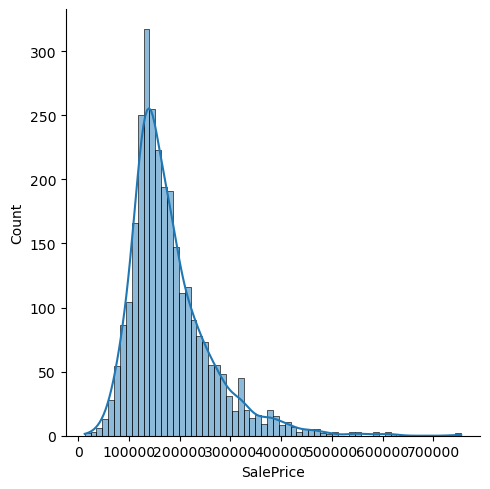

In [19]:
# Target 변수 분포 확인
plt.figure(figsize=(10,2))
sns.displot(df['SalePrice'], kde=True)

<Axes: >

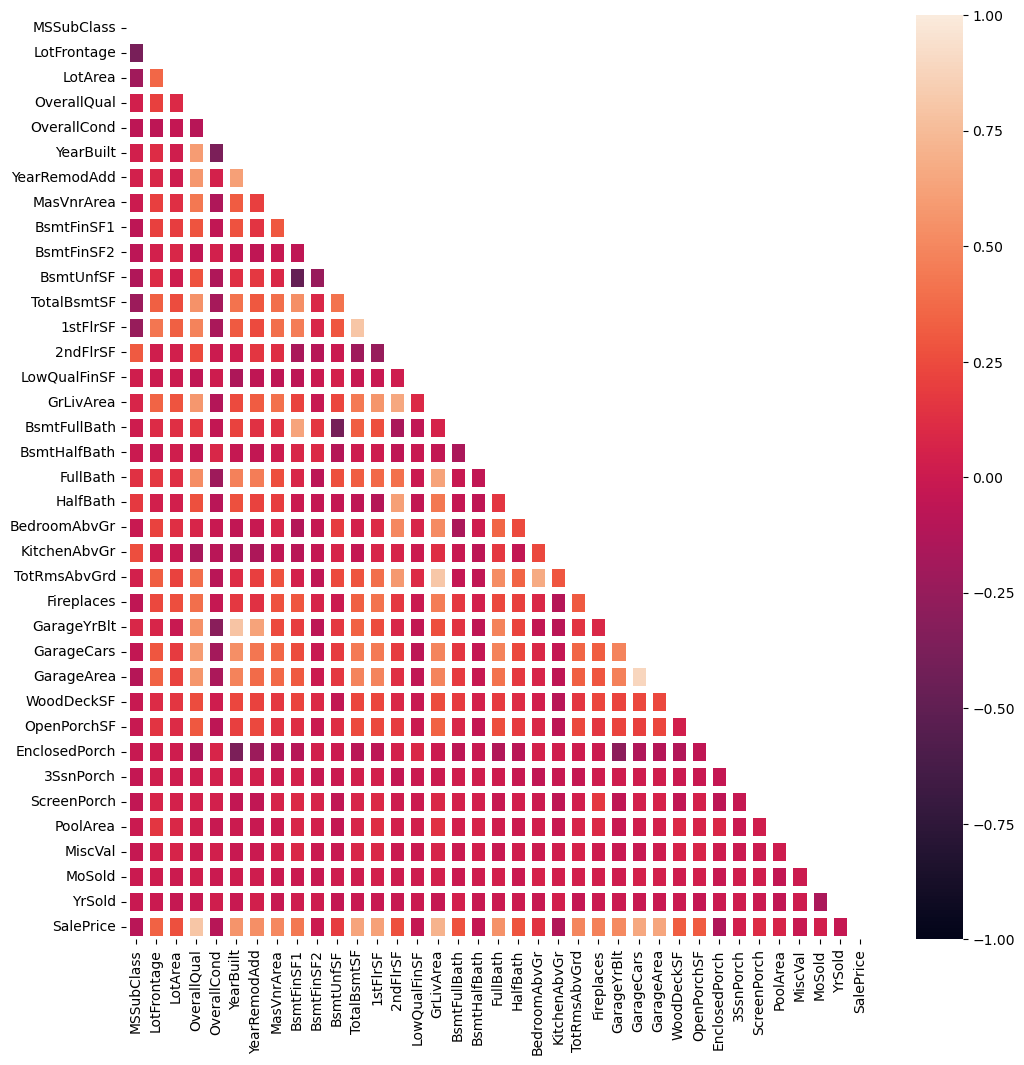

In [20]:
plt.figure(figsize=(12,12))
corr = df[numerical_list].corr()
sns.heatmap(corr, annot=False, vmin=-1, vmax=1, linewidths=5, mask=np.triu(corr))

In [21]:
corr_df = pd.DataFrame(corr['SalePrice'].sort_values(ascending=False)).reset_index()
corr_df.columns = ['feature', 'corr']
corr_df

,feature,corr
0,SalePrice,1.000000
1,OverallQual,0.800888
2,GrLivArea,0.708096
3,GarageCars,0.649497
4,GarageArea,0.641731
5,TotalBsmtSF,0.633055
6,1stFlrSF,0.621541
7,YearBuilt,0.558433
8,FullBath,0.548138
9,YearRemodAdd,0.533158


In [22]:
n_features = corr_df.loc[np.abs(corr_df['corr']) > 0.5, 'feature'].to_list()
type(n_features), n_features

(list,
 ['SalePrice',
  'OverallQual',
  'GrLivArea',
  'GarageCars',
  'GarageArea',
  'TotalBsmtSF',
  '1stFlrSF',
  'YearBuilt',
  'FullBath',
  'YearRemodAdd',
  'GarageYrBlt',
  'MasVnrArea'])

<Axes: >

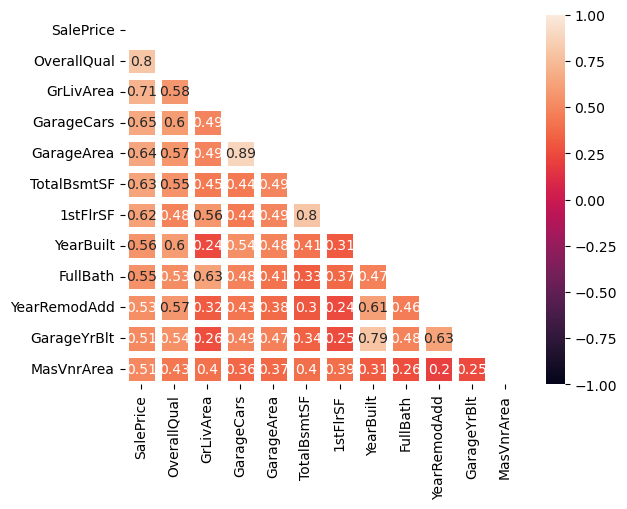

In [23]:
corr = df[n_features].corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, linewidths=5, mask=np.triu(corr))

In [24]:
# 문자형 변수와 타겟 관계 탐색

In [25]:
for col in sorted(categorical_list):
    temp = df.groupby(col)['SalePrice'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)
    temp['lift'] = temp['mean'] / df['SalePrice'].mean()
    temp['ratio'] = round(temp['count']/len(df)*100, 2)
    print(temp)
    print('-'*50)

          count           mean      lift  ratio
BldgType                                       
TwnhsE      227  191534.916300  1.059918   7.78
1Fam       2425  184812.041237  1.022715  83.08
Duplex      109  139808.935780  0.773676   3.73
Twnhs        96  133456.666667  0.738524   3.29
2fmCon       62  125581.709677  0.694945   2.12
--------------------------------------------------
          count           mean      lift  ratio
BsmtCond                                       
Gd          122  214604.303279  1.187579   4.18
TA         2606  183778.440906  1.016995  89.28
Po            5  124063.200000  0.686542   0.17
Fa          104  123315.480769  0.682404   3.56
None         82  108917.536585  0.602729   2.81
--------------------------------------------------
              count           mean      lift  ratio
BsmtExposure                                       
Gd              276  269651.887681  1.492202   9.46
Av              418  207438.478469  1.147925  14.32
Mn              23

In [26]:
categorical_list.remove('Street')
categorical_list.remove('Utilities')
categorical_list.remove('Functional')
categorical_list.remove('LandSlope')
c_features = categorical_list

In [27]:
feature_list = n_features + c_features
df = df[feature_list]
df.shape

(2919, 47)

In [28]:
type(c_features)

list

# Session 3 TabNet 활용 소득 예측

In [29]:
target = 'SalePrice'
if 'Set' not in df.columns:
    df['Set'] = np.random.choice(['train', 'valid', 'test'], p=[0.8, 0.1, 0.1], size=(df.shape[0]))
train_indices = df[df['Set']=='train'].index
valid_indices = df[df['Set']=='valid'].index
test_indices = df[df['Set']=='test'].index

In [30]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = []
categorical_dims = {}

for col in c_features:
    print(col, df[col].nunique())
    l_enc = LabelEncoder()
    df[col] = l_enc.fit_transform(df[col].values)
    categorical_columns.append(col)
    categorical_dims[col] = len(l_enc.classes_)

MSZoning 6
LotShape 4
LandContour 4
LotConfig 5
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 16
Exterior2nd 17
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 5
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
SaleType 10
SaleCondition 6


In [31]:
unused_feat = ['Set']
features = [col for col in df.columns if col not in unused_feat+[target]]
cat_idxs = [idx for idx, f in enumerate(features) if f in categorical_columns]
cat_dims = [categorical_dims[f] for f in features if f in categorical_columns]

# 모델 학습 및 평가
* 딥러닝 모델 학습 및 평가

In [32]:
# train, valid, test data 분할
X_train = df.loc[train_indices, features].values
y_train = df.loc[train_indices, target].values.reshape(-1, 1)
X_train.shape, y_train.shape

((2334, 46), (2334, 1))

In [33]:
X_valid = df.loc[valid_indices, features].values
y_valid = df.loc[valid_indices, target].values.reshape(-1, 1)
X_valid.shape, y_valid.shape

((301, 46), (301, 1))

In [34]:
X_test = df.loc[test_indices, features].values
y_test = df.loc[test_indices, target].values.reshape(-1, 1)
X_test.shape, y_test.shape

((284, 46), (284, 1))

In [73]:
# TabNet
from pytorch_tabnet.tab_model import TabNetRegressor
import torch
reg = TabNetRegressor(
    cat_dims=cat_dims,
    cat_emb_dim=10,
    cat_idxs=cat_idxs,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-1),
    verbose=10
)
reg

C:\Users\dukim\miniconda3\envs\bootcamp\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


TabNetRegressor(n_d=8, n_a=8, n_steps=3, gamma=1.3, cat_idxs=[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], cat_dims=[6, 4, 4, 5, 25, 9, 8, 5, 8, 6, 8, 16, 17, 4, 4, 5, 6, 5, 5, 5, 7, 7, 6, 5, 2, 6, 5, 6, 7, 4, 6, 6, 3, 10, 6], cat_emb_dim=[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10], n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.02, lambda_sparse=0.001, seed=0, clip_value=1, verbose=10, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.1}, scheduler_fn=None, scheduler_params={}, mask_type='sparsemax', input_dim=None, output_dim=None, device_name='auto', n_shared_decoder=1, n_indep_decoder=1, grouped_features=[])

In [74]:
# 모델 학습
max_epochs = 1000
model = reg.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['rmse'],
    max_epochs=max_epochs,
    patience=300
)

epoch 0  | loss: 39590078464.0| train_rmse: 197196.69879| valid_rmse: 189272.27376|  0:00:00s
epoch 10 | loss: 39300247552.0| train_rmse: 192550.33686| valid_rmse: 184244.38997|  0:00:03s
epoch 20 | loss: 39427561472.0| train_rmse: 192343.15935| valid_rmse: 183967.49916|  0:00:06s
epoch 30 | loss: 38990323712.0| train_rmse: 192634.60362| valid_rmse: 184738.96887|  0:00:09s
epoch 40 | loss: 37639196672.0| train_rmse: 188765.52833| valid_rmse: 180591.8446|  0:00:12s
epoch 50 | loss: 36998823936.0| train_rmse: 179764.70329| valid_rmse: 171293.79828|  0:00:15s
epoch 60 | loss: 35814363136.0| train_rmse: 172104.23042| valid_rmse: 163495.34458|  0:00:18s
epoch 70 | loss: 34450746368.0| train_rmse: 164426.56633| valid_rmse: 155669.37059|  0:00:21s
epoch 80 | loss: 33397818368.0| train_rmse: 161893.80128| valid_rmse: 153964.14368|  0:00:24s
epoch 90 | loss: 32439034880.0| train_rmse: 168976.72086| valid_rmse: 162223.01299|  0:00:27s
epoch 100| loss: 30571862016.0| train_rmse: 155079.89816| val

C:\Users\dukim\miniconda3\envs\bootcamp\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


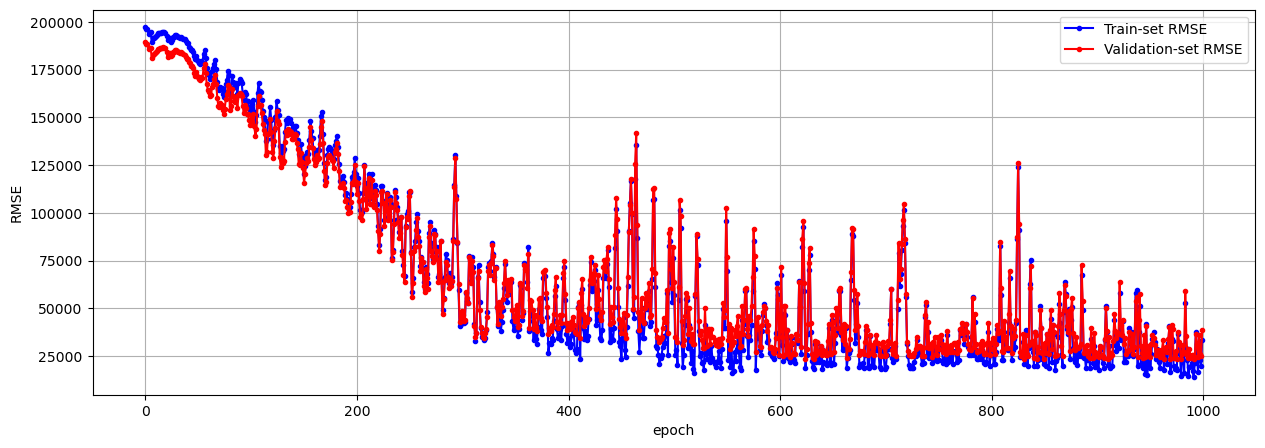

In [75]:
train_rmse = reg.history['train_rmse']
val_rmse = reg.history['valid_rmse']

x_len = np.arange(len(val_rmse))
plt.figure(figsize=(15,5))
plt.plot(x_len, train_rmse, marker='.', c='blue', label='Train-set RMSE')
plt.plot(x_len, val_rmse, marker='.', c='red', label='Validation-set RMSE')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.show()

In [76]:
preds = reg.predict(X_test)
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, preds, squared=False)
RMSE

31015.945585327638

In [77]:
preds = reg.predict(X_test)
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, preds+100000, squared=False)
RMSE

99751.98159117575

In [78]:
df[target].describe().std()

239919.375755348

# 변수 중요도 분석(Global, Local)
* TabNet의 장점 : 개별 instance에 대한 Local 중요도와 전체 관점에서 Global 중요도 확인

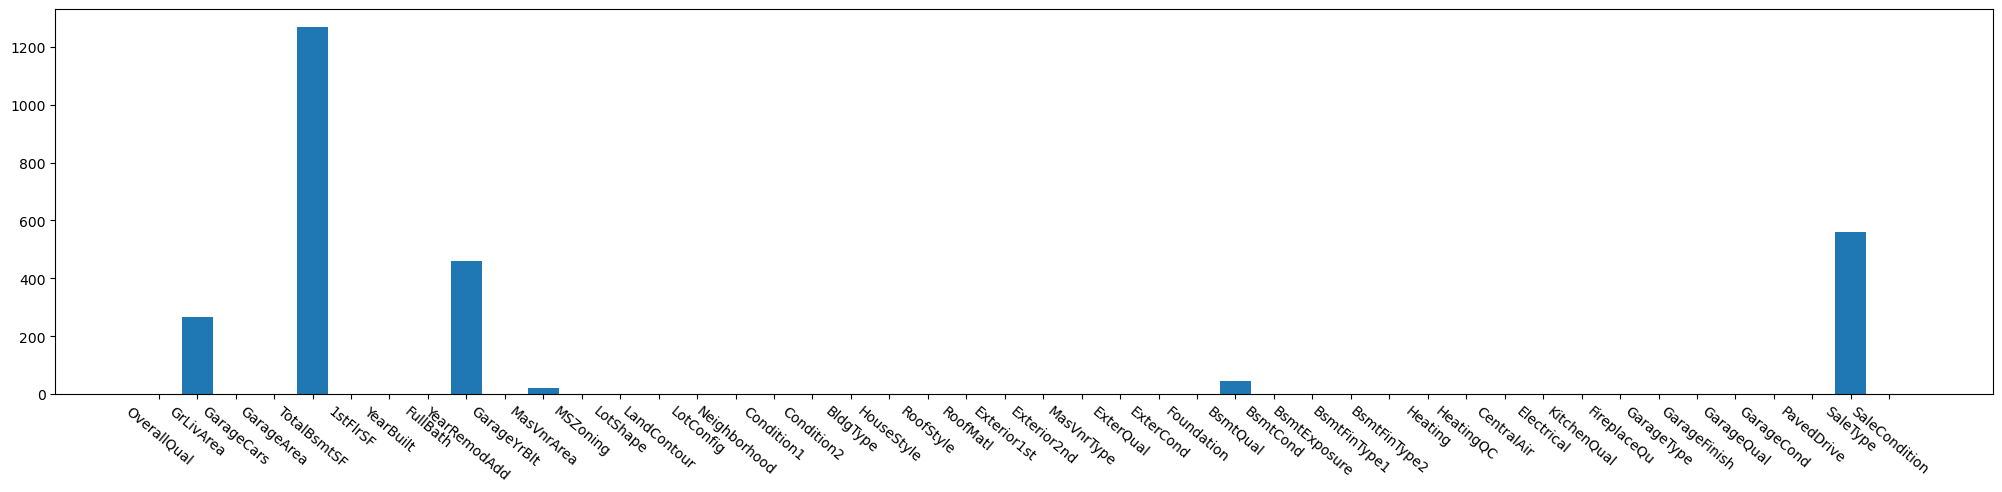

In [79]:
# 개별 값 변수 중요도
explain_matrix, masks = reg.explain(X_test)

fig = plt.figure(figsize=(25,5))
plt.bar(feature_list[1:], explain_matrix[0]) # explain_matrix는 각 행별 칼럼의 영향도 값이 들어있음
plt.xticks(feature_list[1:], rotation=-40)
plt.show()

In [80]:
len(explain_matrix)

284

In [81]:
y_test[:, 0]

array([208500., 157000., 230000., 309000., 177000., 180000., 107400.,
       136500.,  94750., 178000., 198900., 176000., 181000., 190000.,
       163000., 172500., 153337., 286000., 130000., 112000., 180500.,
       161750., 107000., 235000., 145000., 185000., 142500., 205000.,
       119000., 157500., 192000., 169500., 164990., 228000., 135000.,
       119000., 118000., 172500.,  62383., 178740., 215000., 446261.,
        39300., 107500., 229000., 141000., 234000., 325000., 120000.,
       139000., 110000., 151000., 225000., 240000., 168500., 209500.,
       423000., 129000., 221000., 207500., 141000.,  55000., 189000.,
       120500., 236500., 163000., 142000.,  98000., 100000., 337000.,
       270000., 196500., 165500., 139000., 269790., 110000., 181000.,
       137000., 147400., 174900., 152000., 116000., 350000., 157000.,
       142953., 110000., 125500., 173733., 238000., 207500., 190000.,
       270000., 192500., 185000., 337500., 185000.,  86000., 240000.,
       112500., 1675

In [82]:
preds

array([[157981.38 ],
       [156874.12 ],
       [222930.78 ],
       [566639.1  ],
       [164284.5  ],
       [249554.3  ],
       [105873.6  ],
       [113484.734],
       [102457.31 ],
       [172256.75 ],
       [173939.69 ],
       [174152.6  ],
       [153303.6  ],
       [189085.95 ],
       [157911.06 ],
       [202791.8  ],
       [118184.67 ],
       [270851.28 ],
       [150868.08 ],
       [122793.805],
       [174948.34 ],
       [143203.5  ],
       [107763.41 ],
       [258578.1  ],
       [143259.75 ],
       [162351.12 ],
       [142611.67 ],
       [199017.4  ],
       [135887.9  ],
       [147268.34 ],
       [172988.08 ],
       [163922.9  ],
       [189624.3  ],
       [250348.31 ],
       [139441.58 ],
       [120458.84 ],
       [103192.625],
       [184600.83 ],
       [131145.28 ],
       [154862.81 ],
       [191184.75 ],
       [414495.62 ],
       [ 58162.457],
       [127242.47 ],
       [254130.05 ],
       [120902.75 ],
       [191278.03 ],
       [26998

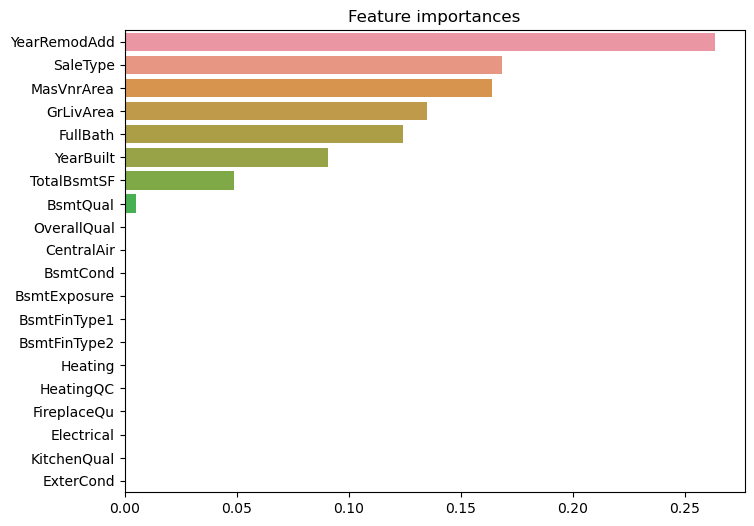

In [83]:
# Global 영향도 확인
ftr_importance_values = reg.feature_importances_
ftr_importance = pd.Series(ftr_importance_values, index=feature_list[1:])
ftr_top20 = ftr_importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [84]:
type(preds), preds.shape

(numpy.ndarray, (284, 1))

In [85]:
type(y_test), y_test.shape

(numpy.ndarray, (284, 1))

<Axes: >

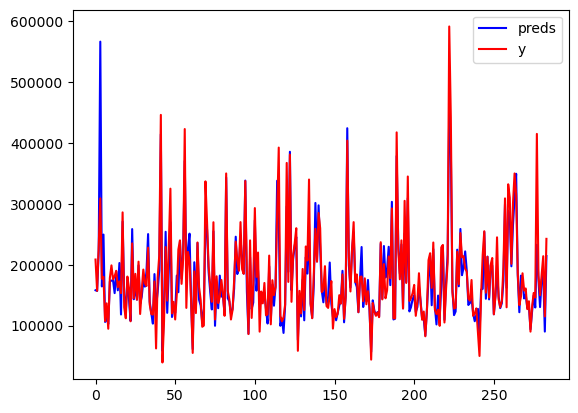

In [86]:
sns.lineplot(preds.reshape(-1), color='blue', label='preds')
sns.lineplot(y_test.reshape(-1), color='red', label='y')

<Axes: >

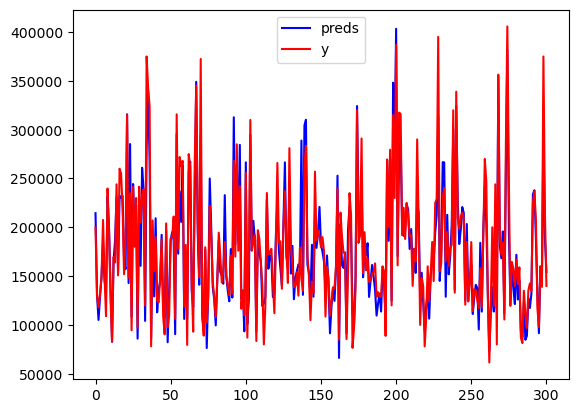

In [87]:
val_preds = reg.predict(X_valid)
sns.lineplot(val_preds.reshape(-1), color='blue', label='preds')
sns.lineplot(y_valid.reshape(-1), color='red', label='y')